In [1]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import gymnasium as gym
import collections
import random
import matplotlib.pyplot as plt
import SAC_class_setting
from util import *
import replay_buffer as rb

In [2]:
env_name = 'Hopper-v2'
env = gym.make(env_name)

/home/nomushroom/anaconda3/envs/rl/lib/python3.9/site-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment Hopper-v2 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(
/home/nomushroom/anaconda3/envs/rl/lib/python3.9/site-packages/gymnasium/envs/mujoco/mujoco_env.py:185: DeprecationWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.deprecation(


# SAC training

In [3]:
actor_lr = 3e-4
critric_lr = 3e-4
alpha_lr = 3e-4
num_episodes = 3000
hidden_dim = 128
gamma = 0.99
tau = 0.005
buffer_size = 100000
minimal_size = 1000
batch_size = 64
hidden_layer_num = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
replay_buffer = 'PrioritizedReplayBuffer'

per_agent = SAC_class_setting.SACContinuous(replay_buffer, batch_size, buffer_size, env, hidden_dim, hidden_layer_num, actor_lr, critric_lr, alpha_lr, tau, gamma, device,
                                            scheduler_open=True, scheduler_size=100000, scheduler_gamma=0.9)

per_return_list = train_off_policy_agent(env, per_agent, num_episodes, minimal_size, batch_size)

Iteration 0:   0%|          | 0/300 [00:00<?, ?it/s]/home/nomushroom/vsc/SAC_imitationlearning/SAC_class_setting.py:67: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1686122008392/work/torch/csrc/utils/tensor_new.cpp:261.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 0: 100%|██████████| 300/300 [02:11<00:00,  2.28it/s, episode=300, return=9.156]  


{'Actor loss': -60.18975067138672, 'Critic1 loss': 2.2838170528411865}


Iteration 1: 100%|██████████| 300/300 [03:15<00:00,  1.53it/s, episode=600, return=198.909]


{'Actor loss': -110.21936798095703, 'Critic1 loss': 7.27744197845459}


Iteration 2: 100%|██████████| 300/300 [04:57<00:00,  1.01it/s, episode=900, return=522.310]


{'Actor loss': -118.07003021240234, 'Critic1 loss': 5.546507835388184}


Iteration 3: 100%|██████████| 300/300 [08:19<00:00,  1.67s/it, episode=1200, return=1230.830]


{'Actor loss': -178.84207153320312, 'Critic1 loss': 4.341958522796631}


Iteration 4: 100%|██████████| 300/300 [12:06<00:00,  2.42s/it, episode=1500, return=1232.503]


{'Actor loss': -264.09295654296875, 'Critic1 loss': 2.0240235328674316}


Iteration 5: 100%|██████████| 300/300 [15:55<00:00,  3.19s/it, episode=1800, return=1846.676]


{'Actor loss': -287.2106018066406, 'Critic1 loss': 5.222204208374023}


Iteration 6: 100%|██████████| 300/300 [17:01<00:00,  3.40s/it, episode=2100, return=1261.034]


{'Actor loss': -294.4504089355469, 'Critic1 loss': 1.360812783241272}


Iteration 7: 100%|██████████| 300/300 [26:56<00:00,  5.39s/it, episode=2400, return=3457.079]


{'Actor loss': -325.6610107421875, 'Critic1 loss': 1.252790927886963}


Iteration 8: 100%|██████████| 300/300 [44:30<00:00,  8.90s/it, episode=2700, return=3048.057]


{'Actor loss': -328.2557067871094, 'Critic1 loss': 1.713492751121521}


Iteration 9: 100%|██████████| 300/300 [40:13<00:00,  8.05s/it, episode=3000, return=3509.730]

{'Actor loss': -289.150390625, 'Critic1 loss': 2.9459950923919678}


In [4]:
actor_lr = 3e-4
critric_lr = 3e-4
alpha_lr = 3e-4
num_episodes = 3000
hidden_dim = 128
gamma = 0.99
tau = 0.005
buffer_size = 100000
minimal_size = 1000
batch_size = 64
hidden_layer_num = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
replay_buffer = 'ReplayBuffer'

agent = SAC_class_setting.SACContinuous(replay_buffer, batch_size, buffer_size, env, hidden_dim, hidden_layer_num, actor_lr, critric_lr, alpha_lr, tau, gamma, device,
                                            scheduler_open=True, scheduler_size=100000, scheduler_gamma=0.9)

return_list = train_off_policy_agent(env, agent, num_episodes, minimal_size, batch_size)

Iteration 0: 100%|██████████| 300/300 [02:26<00:00,  2.05it/s, episode=300, return=212.360]


{'Actor loss': -87.59842681884766, 'Critic1 loss': 6.100785255432129}


Iteration 1: 100%|██████████| 300/300 [05:25<00:00,  1.09s/it, episode=600, return=260.777]


{'Actor loss': -126.88859558105469, 'Critic1 loss': 35.0741081237793}


Iteration 2: 100%|██████████| 300/300 [07:02<00:00,  1.41s/it, episode=900, return=422.379]


{'Actor loss': -143.13613891601562, 'Critic1 loss': 5.606109619140625}


Iteration 3: 100%|██████████| 300/300 [11:21<00:00,  2.27s/it, episode=1200, return=736.362] 


{'Actor loss': -198.64039611816406, 'Critic1 loss': 4.095148086547852}


Iteration 4: 100%|██████████| 300/300 [15:59<00:00,  3.20s/it, episode=1500, return=884.188] 


{'Actor loss': -261.17291259765625, 'Critic1 loss': 2.198049306869507}


Iteration 5: 100%|██████████| 300/300 [28:30<00:00,  5.70s/it, episode=1800, return=2033.466]


{'Actor loss': -275.7850341796875, 'Critic1 loss': 7.782870292663574}


Iteration 6: 100%|██████████| 300/300 [21:48<00:00,  4.36s/it, episode=2100, return=1959.134]


{'Actor loss': -285.9741516113281, 'Critic1 loss': 1.5401798486709595}


Iteration 7: 100%|██████████| 300/300 [17:22<00:00,  3.48s/it, episode=2400, return=2535.211]


{'Actor loss': -283.76165771484375, 'Critic1 loss': 2.294753313064575}


Iteration 8: 100%|██████████| 300/300 [16:52<00:00,  3.38s/it, episode=2700, return=1277.653]


{'Actor loss': -294.8885803222656, 'Critic1 loss': 2.0256991386413574}


Iteration 9: 100%|██████████| 300/300 [17:34<00:00,  3.51s/it, episode=3000, return=2907.352]

{'Actor loss': -296.35906982421875, 'Critic1 loss': 1.0921077728271484}


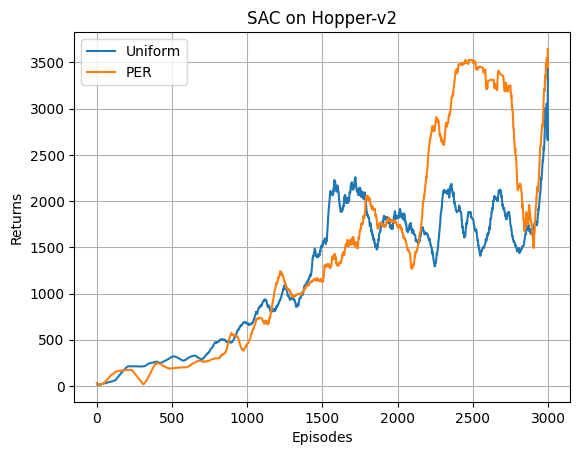

In [5]:
smooth_return_02 = smooth_figure(return_list, 79)
per_smooth_return_02 = smooth_figure(per_return_list, 79)
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, smooth_return_02)
plt.plot(episodes_list, per_smooth_return_02)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('SAC on {}'.format(env_name))
plt.legend(['Uniform', 'PER'])
plt.grid()
plt.show()

# DARC

In [3]:
from darc import DARC
from broken_joint import BrokenJointEnv

In [4]:
env_name = 'Hopper-v2'
source_env = BrokenJointEnv(gym.make(env_name), [])
target_env = BrokenJointEnv(gym.make(env_name), [1])

running_mean = ZFilter((source_env.observation_space.shape[0],), clip=5)
replay_buffer = 'ReplayBuffer'
buffer_size = 100000
batch_size = 64

hidden_dim = 128
hidden_layer_num = 1

actor_lr, critic_lr, alpha_lr, clssifier_lr = 3e-4, 3e-4, 3e-4, 3e-4
tau = 0.005
gamma = 0.99
decay_rate = 0.9
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [5]:
model = DARC(running_mean, replay_buffer, buffer_size, batch_size, source_env, target_env, hidden_dim, hidden_layer_num, 
             actor_lr, critic_lr, alpha_lr, clssifier_lr, tau, gamma, decay_rate, device)

In [6]:
train_darc(model, 1000, False)

TARGET: index: 0, steps: 16, total_rewards: 11.876960887319704
SOURCE: index: 0, steps: 29, total_rewards: 9.023764712000851
TARGET: index: 1, steps: 33, total_rewards: 40.51151715943761
SOURCE: index: 1, steps: 39, total_rewards: 17.95240856375692
TARGET: index: 2, steps: 11, total_rewards: 6.060903663745781
SOURCE: index: 2, steps: 18, total_rewards: 12.487744295328413
TARGET: index: 3, steps: 24, total_rewards: 20.03837719312267
SOURCE: index: 3, steps: 24, total_rewards: 14.999157484555948
TARGET: index: 4, steps: 11, total_rewards: 8.843422937844437
SOURCE: index: 4, steps: 13, total_rewards: 10.440874076951276
TARGET: index: 5, steps: 45, total_rewards: 20.201413118138042
SOURCE: index: 5, steps: 22, total_rewards: 19.346581828561504
TARGET: index: 6, steps: 18, total_rewards: 18.67435067464892
SOURCE: index: 6, steps: 36, total_rewards: 32.350583265395805
TARGET: index: 7, steps: 12, total_rewards: 9.735558639616823
SOURCE: index: 7, steps: 15, total_rewards: 9.470103612716962
T

AttributeError: 'DARC' object has no attribute 'replay_buffer'